# Tasks for laboratory assignment 1

In [1]:
# imports section

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [2]:
def parse_web_page(url):
    """
    Fetch the content of the given web page.

    Args:
        url (str): The URL of the web page to fetch.

    Returns:
        str: The content of the page as a string.

    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    response = requests.get(url)
    response.raise_for_status()
    return BeautifulSoup(response.text).get_text(separator=' ', strip=True)

print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])

Головна - Факультет математики та інформатики Перейти до основного вмісту [email protected] 58012, Україна, м. Чернівці, вул. Університетська, 28 Новини Всі Загальні Оголошення Події Студенту Викладачу Вітання Діяльність Наукова Навчально-методична Міжнар
Web scraping - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Donate Contribute Help Learn to edit Community portal Recent changes Upload file Searc


## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file `result.json`.

In [3]:
def parse_api(api_url):
    """
    Fetch the data of the given API endpoint and save it to result.json.

    Args:
        api_url (str): The URL of the API endpoint.

    Returns:
        None.

    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    result = requests.get(api_url)
    with open("resources/result.json", 'w') as json_file:
        json.dump(result.json(), json_file, indent=1)
    return None 

parse_api('https://api.github.com/')

## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [4]:
def parse_json(date):
    """
    Parse the data from weather.json file and return weather data for a given date.

    Args:
        date (str): The date for which we look up the weather.

    Returns:
        list: a list of weather data for a given date.
    """
    date = datetime.strptime(date, "%Y-%m-%d")
    with open("resources/weather.json") as json_file:
        weather_info = json.load(json_file)
    return list(filter(lambda w : datetime.strptime(w.get("date",""), "%Y-%m-%d") == date, weather_info.get("daily", [])))
    
target_date = '2024-8-19'
print(parse_json(target_date))

[{'date': '2024-08-19', 'max_temperature': 30.0, 'min_temperature': 21.0, 'precipitation': 5.0, 'wind_speed': 10.0, 'humidity': 70, 'weather_description': 'Light rain'}]


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [5]:
def parse_csv(date):
    """
    Parse the data from weather.csv file and return weather data for a given date.

    Args:
        date (str): The date for which we look up the weather.

    Returns:
        list: a list of weather data for a given date.
    """
    date = datetime.strptime(date, "%Y-%m-%d")
    weather_info = pd.read_csv('resources/weather.csv', delimiter=',')
    weather_sample = weather_info[weather_info["CET"].apply(lambda d: datetime.strptime(d, "%Y-%m-%d")) == date]
    
    return weather_sample.values.tolist()
    
target_date = '1997-5-22'
print(parse_csv(target_date))

[['1997-5-22', 25.0, 18.0, 10.0, 11.0, 8.0, 6.0, 88.0, 54.0, 34.0, 1017, 1015, 1012, 10.0, 10.0, 10.0, 11, 3, nan, 0.0, 3.0, nan, 277]]


## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

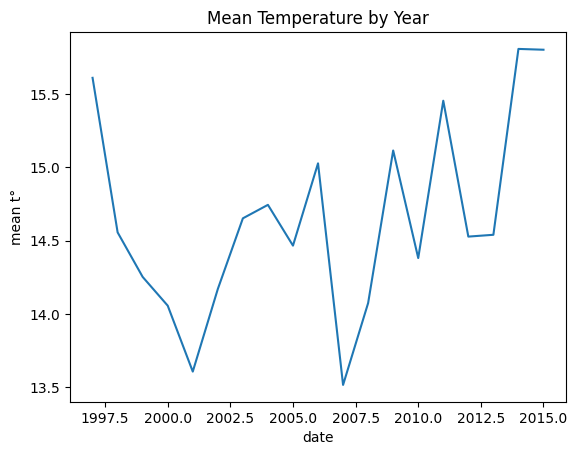

In [6]:
def visualize_data():
    """
    Parse the data from weather.csv file and visualize it using Matplotlib. Use more then one visualization. 
    Save the results in the repository.

    Args:
        None: None.

    Returns:
        None: None.
    """
    weather_info = pd.read_csv('resources/weather.csv', usecols=["CET", "Mean TemperatureC"], delimiter=',')
    weather_data = pd.DataFrame({"year" : weather_info["CET"].apply(lambda d: datetime.strptime(d, "%Y-%m-%d").year), "mean tempC": weather_info["Mean TemperatureC"] })
    year_mean =  weather_data.groupby(["year"]).mean()
    plt.plot(
       year_mean.index,
       year_mean["mean tempC"]
    )
    plt.xlabel("date")
    plt.ylabel("mean t°")
    plt.title('Mean Temperature by Year')
    plt.savefig("resources/weather_visualize.png")
    return None

visualize_data()